In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import numpy as np
import matplotlib.pyplot as plt
import pyvtools.text as vtext

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))
from socket import gethostname

from ToyExample.toy_example import extract_results_from_log, plot_loss
import ours.utils as utils
from matplotlib.patches import Patch

%load_ext autoreload
%autoreload 2

## Compare many

### Parameters

In [2]:
# series = ["18_Statistics", "19_ACIDParams", "21_Repetitions", "23_NormalizedLogits"]
# series = ["23_NormalizedLogits"]
series = ["32_AllMetrics"]

In [3]:
methods = ["Baseline", "Early AJEST", "AJEST", "Random"]

In [53]:
plt_kwargs = dict(color = ["C0", "C3", "C4", "C1"],
                  alpha = [0.5, 0.8, 0.7, 0.6],
                  linewidth = [4, 1, 0.5, 0.5],
                  zorder=[1000,10000,100,10])
plt_kwargs_zoom = dict(color = plt_kwargs["color"],
                       alpha = [0.6, 0.8, 0.7, 0.6],
                       linewidth = [3, 1, 1, 1],
                       zorder = plt_kwargs["zorder"])
plt_kwargs_thin = dict(color = plt_kwargs_zoom["color"],
                       alpha = plt_kwargs_zoom["alpha"],
                       linewidth = [2, 0.5, 0.5, 0.5],
                       zorder = plt_kwargs["zorder"])
plt_kwargs_val = dict(color = plt_kwargs["color"],
                      alpha = plt_kwargs_zoom["alpha"],
                      linewidth = [3, 2, 2, 2],
                      zorder = plt_kwargs["zorder"])
plt_kwargs_paper = dict(color = plt_kwargs["color"],
                        alpha = [0.6, 0.8, 0.5, 0.6],
                        linewidth = [5, 2, 3, 4],
                        zorder = plt_kwargs["zorder"],
                        markersize=[4, 4, 4, 4])
plt_kwargs = {s:{k:v[i] for k,v in plt_kwargs.items()} for i,s in enumerate(methods)}
plt_kwargs_zoom = {s:{k:v[i] for k,v in plt_kwargs_zoom.items()} for i,s in enumerate(methods)}
plt_kwargs_val = {s:{k:v[i] for k,v in plt_kwargs_val.items()} for i,s in enumerate(methods)}
plt_kwargs_paper = {s:{k:v[i] for k,v in plt_kwargs_paper.items()} for i,s in enumerate(methods)}
plt_kwargs_thin = {s:{k:v[i] for k,v in plt_kwargs_thin.items()} for i,s in enumerate(methods)}

### Auxiliary definitions

In [5]:
get_path = lambda series : os.path.join(dirs.MODELS_HOME, "ToyExample", series)

host_id = gethostname()
other_hosts = vtext.filter_by_string_must(list(dirs.check_directories_file().keys()), [host_id,"else"], must=False)

series_folders = {}
for s in series:
    series_path = get_path(s)
    contents = os.listdir(series_path)
    folders = [c for c in contents if os.path.isdir(os.path.join(series_path, c))]
    folders = vtext.filter_by_string_must(folders, ["Failed", "Old"], must=False)
    series_folders[s] = folders

In [6]:
for s in series:
    if "NormalizedLogits" in s:
        sort_order = ["NoACID", "ACID", "EarlyACID", "LateACID", "InterpolACID", "EarlyInterpol", "LateInterpol"]
        sorted_folders = []
        for st in sort_order:
            for f in series_folders[s]:
                if f.startswith(st):
                    sorted_folders.append(f)
        series_folders[s] = sorted_folders

In [7]:
label_series = {}
for s in series:
    label_series[s] = {}
    for f in series_folders[s]:
        label = " ".join(utils.split_camel_case(f))
        label = label.replace("No ACID", "Baseline")
        if "Non Inverted" in label:
            label = label.replace("ACID Non Inverted", "ACID")
        else:
            label = label.replace("ACID", "iACID")
        label = label.replace("Interpol ", "p")
        label = label.replace("ACID", "AJEST")
        label = label.replace("_000", "")
        label_series[s][f] = label
label_series

{'32_AllMetrics': {'Random': 'Random',
  'NoACID': 'Baseline',
  'ACIDNonInverted': 'AJEST',
  'EarlyACIDNonInverted': 'Early AJEST'}}

### Load data

In [8]:
loss_results = {}
val_results = {}
other_results = {}

for s in series:

    series_path = get_path(s)
    log_files = ["log_"+f+".txt" for f in series_folders[s]]
    assert all([os.path.isfile(os.path.join(series_path, f)) for f in log_files]), "Some logs have not been found"

    loss_results[s] = {}
    val_results[s] = {}
    other_results[s] = {}
    for f, log_file in zip(series_folders[s], log_files):

        log_filepath = os.path.join(series_path, log_file)

        these_results = extract_results_from_log(log_filepath)

        loss_results[s][f] = {}
        val_results[s][f] = {}
        other_results[s][f] = {}
        for key, value in these_results.items():
            if "val" in key or ("score" in key and "test" not in key):
                val_results[s][f][key] = value
            elif "loss" in key and "test" not in key:
                loss_results[s][f][key] = value
            else:
                other_results[s][f][key] = value

In [9]:
loss_results

{'32_AllMetrics': {'Random': {'super_learner_loss': [0.23463860154151917,
    0.24898794293403625,
    0.2442840337753296,
    0.23424966633319855,
    0.21946516633033752,
    0.23312491178512573,
    0.22219660878181458,
    0.21975527703762054,
    0.21704915165901184,
    0.2086580991744995,
    0.2042716145515442,
    0.21198096871376038,
    0.2035629153251648,
    0.17908760905265808,
    0.1858467012643814,
    0.18075811862945557,
    0.16732154786586761,
    0.17272257804870605,
    0.17388597130775452,
    0.1685827672481537,
    0.1641690731048584,
    0.16879457235336304,
    0.16543899476528168,
    0.16868430376052856,
    0.1593906283378601,
    0.16088196635246277,
    0.1650678813457489,
    0.16160626709461212,
    0.14949354529380798,
    0.1493901014328003,
    0.15567466616630554,
    0.1492106169462204,
    0.15977048873901367,
    0.14528191089630127,
    0.14384689927101135,
    0.14637845754623413,
    0.1463710367679596,
    0.14501459896564484,
    0.1337531

### Get keys and fill gaps

#### Training Loss

In [10]:
loss_keys = set()
for s in series:
    for f in loss_results[s].keys():
        loss_keys.update( list(loss_results[s][f].keys()) )

In [11]:
for key in loss_keys:
    for s in series:
        for f, vals in loss_results[s].items():
            if key not in vals.keys():
                loss_results[s][f][key] = None

In [12]:
loss_keys

{'learner_loss', 'super_learner_loss', 'super_ref_loss'}

In [13]:
loss_names = {
    "learner_loss":"Learner's Average Loss",
    "super_learner_loss":"Learner's Super-Batch Average Loss",
    "super_ref_loss":"Reference's Super-Batch Average Loss"
}
assert all([key in loss_names.keys() for key in loss_keys]), "Missing key"

In [14]:
loss_keys = list(loss_names.keys())
sorted_results = {key: {s: {f: loss_results[s][f][key] for f in series_folders[s]} for s in series} for key in loss_keys}

#### Validation metrics

In [15]:
val_keys = set()
for s in series:
    for f in val_results[s].keys():
        val_keys.update( list(val_results[s][f].keys()) )

In [16]:
for key in val_keys:
    for s in series:
        for f, vals in val_results[s].items():
            if key not in vals.keys():
                val_results[s][f][key] = None

In [17]:
val_keys

{'L2_val_metric',
 'ema_L2_val_metric',
 'ema_classification_score',
 'ema_guided_L2_val_metric',
 'ema_guided_classification_score',
 'ema_guided_mandala_score',
 'ema_guided_out_L2_val_metric',
 'ema_mandala_score',
 'ema_out_L2_val_metric',
 'ema_out_val_loss',
 'ema_val_loss',
 'guide_out_val_loss',
 'guide_val_loss',
 'guided_L2_val_metric',
 'guided_out_L2_val_metric',
 'learner_classification_score',
 'learner_guided_classification_score',
 'learner_guided_mandala_score',
 'learner_mandala_score',
 'learner_out_val_loss',
 'learner_val_loss',
 'out_L2_val_metric',
 'ref_out_val_loss',
 'ref_val_loss'}

In [18]:
val_keys = [k for k in val_keys if "ema" not in k]
val_keys

['learner_out_val_loss',
 'learner_mandala_score',
 'guide_out_val_loss',
 'guide_val_loss',
 'L2_val_metric',
 'ref_val_loss',
 'learner_classification_score',
 'out_L2_val_metric',
 'learner_val_loss',
 'ref_out_val_loss',
 'learner_guided_mandala_score',
 'learner_guided_classification_score',
 'guided_L2_val_metric',
 'guided_out_L2_val_metric']

In [ ]:
val_names = {
    "ema_val_loss":"EMA's Validation Average Loss",
    "ema_out_val_loss":"EMA's Validation Outer Average Loss",
    "learner_val_loss":"Learner's Validation Average Loss",
    "learner_out_val_loss":"Learner's Validation Outer Average Loss",
    "ref_val_loss":"Reference's Validation Average Loss",
    "ref_out_val_loss":"Reference's Validation Outer Average Loss",
    "guide_val_loss":"Guide's Validation Average Loss",
    "guide_out_val_loss":"Guide's Validation Outer Average Loss",
    "ema_L2_val_metric":"EMA's Validation Average L2 Distance",
    "ema_out_L2_val_metric":"EMA's Validation Outer Average L2 Distance",
    "L2_val_metric":"Learner's Validation Average L2 Distance",
    "out_L2_val_metric":"Learner's Validation Outer Average L2 Distance",
    "ema_guided_L2_val_metric":"Guided EMA's Validation Average L2 Distance",
    "ema_guided_out_L2_val_metric":"Guided EMA's Validation Outer Average L2 Distance",
    "guided_L2_val_metric":"Guided Learner's Validation Average L2 Distance",
    "guided_out_L2_val_metric":"Guided Learner's Validation Outer Average L2 Distance",
    "ema_mandala_score":"EMA's Validation Mandala Score",
    "learner_mandala_score":"Learner's Validation Mandala Score",
    "ema_guided_mandala_score":"Guided EMA's Validation Mandala Score",
    "learner_guided_mandala_score":"Guided Learner's Validation Mandala Score",
    "ema_classification_score":"EMA's Validation Classification Score",
    "learner_classification_score":"Learner's Validation Classification Score",
    "ema_guided_classification_score":"Guided EMA's Validation Classification Score",
    "learner_guided_classification_score":"Guided Learner's Validation Classification Score",
}
assert all([key in val_names.keys() for key in val_keys]), "Missing key"

In [20]:
# val_keys = list(val_names.keys())
sorted_val_results = {key: {s: {f: val_results[s][f][key] for f in series_folders[s]} for s in series} for key in val_keys}

In [21]:
sorted_val_results

{'learner_out_val_loss': {'32_AllMetrics': {'Random': [0.3767052888870239,
    0.4111642837524414,
    0.36012643575668335,
    0.3719797432422638,
    0.35780465602874756,
    0.3965952694416046,
    0.4369608759880066,
    0.43029409646987915,
    0.4402987062931061,
    0.42317986488342285,
    0.41798651218414307,
    0.4450673460960388,
    0.40782129764556885,
    0.42563891410827637,
    0.44513875246047974,
    0.4543595314025879,
    0.39006632566452026,
    0.3602091670036316,
    0.3592252731323242,
    0.379413902759552,
    0.36525630950927734,
    0.4018700122833252,
    0.34641435742378235,
    0.3580065369606018,
    0.34939223527908325,
    0.3514598309993744,
    0.38659247756004333,
    0.4820291996002197,
    0.38812488317489624,
    0.39868253469467163,
    0.38403457403182983,
    0.38175028562545776,
    0.4028790593147278,
    0.3943507671356201,
    0.3734871745109558,
    0.406572163105011,
    0.3483080565929413,
    0.39333248138427734,
    0.409077107906341

In [22]:
final_test_names= [
    'Average Loss',
    'Outer Average Loss',
    'Average L2 Distance',
    'Guided Average L2 Distance',
    'Outer Average L2 Distance',
    'Guided Outer Average L2 Distance',
    'Mandala Score',
    'Guided Mandala Score',
    'Classification Score',
    'Guided Classification Score',
]

In [23]:
final_val_names = {}
final_val_results = {}
for s in series:
    final_val_results[s] = {}
    for f in series_folders[s]:
        l = label_series[s][f]
        final_val_results[s][l] = {"Learner":{}, "EMA":{}}
        for k in val_keys:
            if "Learner's" in val_names[k]:
                name = "".join(val_names[k].split("Learner's "))
                try:
                    final_val_results[s][l]["Learner"][name] = val_results[s][f][k]
                except KeyError:
                    final_val_results[s][l]["Learner"] = {name: val_results[s][f][k]}
            elif "EMA's" in val_names[k]:
                name = "".join(val_names[k].split("EMA's "))
                try:
                    final_val_results[s][l]["EMA"][name] = val_results[s][f][k]
                except KeyError:
                    final_val_results[s][l]["EMA"] = {name: val_results[s][f][k]}
            else:
                name = val_names[k].split("Guide's ")[-1].split("Reference's ")[-1]
                try:
                    final_val_results[s][l]["Reference"][name] = val_results[s][f][k]
                except KeyError:
                    final_val_results[s][l]["Reference"] = {name: val_results[s][f][k]}
            final_val_names[k] = name
final_val_results

{'32_AllMetrics': {'Random': {'Learner': {'Validation Outer Average Loss': [0.3767052888870239,
     0.4111642837524414,
     0.36012643575668335,
     0.3719797432422638,
     0.35780465602874756,
     0.3965952694416046,
     0.4369608759880066,
     0.43029409646987915,
     0.4402987062931061,
     0.42317986488342285,
     0.41798651218414307,
     0.4450673460960388,
     0.40782129764556885,
     0.42563891410827637,
     0.44513875246047974,
     0.4543595314025879,
     0.39006632566452026,
     0.3602091670036316,
     0.3592252731323242,
     0.379413902759552,
     0.36525630950927734,
     0.4018700122833252,
     0.34641435742378235,
     0.3580065369606018,
     0.34939223527908325,
     0.3514598309993744,
     0.38659247756004333,
     0.4820291996002197,
     0.38812488317489624,
     0.39868253469467163,
     0.38403457403182983,
     0.38175028562545776,
     0.4028790593147278,
     0.3943507671356201,
     0.3734871745109558,
     0.406572163105011,
     0.3483080

### Time and number of examples

In [24]:
time_key = "training_time"
examples_key = "examples_seen"

x_keys = [time_key, examples_key]
# x_names = ["Training time [min]", "Examples seen [millions]"]

x_names = {time_key:"Training time [min]",
           examples_key:"Examples seen [millions]"}

In [25]:
other_results

{'32_AllMetrics': {'Random': {'learner_test_loss': 0.010422258637845516,
   'ema_test_loss': 0.010783822275698185,
   'L2_test_metric': 0.015502414666116238,
   'ema_L2_test_metric': 0.01671012118458748,
   'guide_test_loss': 0.05083620548248291,
   'learner_out_test_loss': 0.22673161327838898,
   'ema_out_test_loss': 0.2376040518283844,
   'out_L2_test_metric': 0.4817640483379364,
   'ema_out_L2_test_metric': 0.48193538188934326,
   'guide_out_test_loss': 0.2830009460449219,
   'examples_seen': [819,
    1638,
    2457,
    3276,
    4095,
    4914,
    5733,
    6552,
    7371,
    8190,
    9009,
    9828,
    10647,
    11466,
    12285,
    13104,
    13923,
    14742,
    15561,
    16380,
    17199,
    18018,
    18837,
    19656,
    20475,
    21294,
    22113,
    22932,
    23751,
    24570,
    25389,
    26208,
    27027,
    27846,
    28665,
    29484,
    30303,
    31122,
    31941,
    32760,
    33579,
    34398,
    35217,
    36036,
    36855,
    37674,
    38493

In [26]:
x_keys

['training_time', 'examples_seen']

In [27]:
x_results = {key: {s: {f: loss_results[s][f][key] for f in series_folders[s]} for s in series} for key in loss_keys}

In [28]:
x_results = {}
for key in x_keys:
    x_results[key] = {}
    for s in series:
        x_results[key][s] = {}
        for f in series_folders[s]:
            if "time" in key:
                if len(other_results[s][f][key])>4096:
                    x_results[key][s][f] = other_results[s][f][key][0::2]
                else:
                    x_results[key][s][f] = other_results[s][f][key] # min
            else:
                x_results[key][s][f] = np.array(other_results[s][f][key])/1e6 # millions of examples

In [29]:
x_results

{'training_time': {'32_AllMetrics': {'Random': [0.007195969422658284,
    0.009222634633382161,
    0.010990353425343831,
    0.01230306625366211,
    0.014318962891896566,
    0.015095853805541992,
    0.018583762645721435,
    0.02165305217107137,
    0.022185866038004556,
    0.022874494393666584,
    0.025338574250539144,
    0.0290269136428833,
    0.029626142978668214,
    0.0337347944577535,
    0.037835097312927245,
    0.03853749434153239,
    0.04172707001368205,
    0.04497960805892944,
    0.04811261494954427,
    0.05018782615661621,
    0.050947348276774086,
    0.054145558675130205,
    0.05732417106628418,
    0.06051086187362671,
    0.06139288345972697,
    0.06215304931004842,
    0.06536483764648438,
    0.06867079734802246,
    0.07186233202616374,
    0.07440309127171835,
    0.07515460252761841,
    0.07796442111333211,
    0.0811609148979187,
    0.08252926270167033,
    0.0855214516321818,
    0.08637896378835043,
    0.08746660153071086,
    0.0907065590222676

#### Other parameters

In [30]:
log_filepaths = {}
for s in series:
    series_path = get_path(s)
    log_files = ["log_"+f+".txt" for f in series_folders[s]]
    assert all([os.path.isfile(os.path.join(series_path, f)) for f in log_files]), "Some logs have not been found"
    
    log_filepaths[s] = {}
    for f, log_file in zip(series_folders[s], log_files):
        log_filepaths[s][f] = os.path.join(series_path, log_file)
        # for h in other_hosts:
                # guide_filepath = guide_filepath.replace(dirs.check_directories_file()[h]["models_home"], dirs.MODELS_HOME)

In [31]:
total_iters = 4096

acid_trigger = {}
for s in series:
    acid_trigger[s] = {}
    for f in series_folders[s]:
        found = False
        if "NoACID" in f:
            acid_trigger[s][f] = total_iters
            found = True
        else:
            with open(log_filepaths[s][f], "r") as file:
                for line in file:
                    if "Iteration" in line:
                        i = vtext.find_numbers( line.split("Iteration = ")[1] )[0]
                    elif "Network has beaten the reference" in line:
                        found = True
                        acid_trigger[s][f] = i
        if not found:
            if "Late" in f or "NoACID" in f:
                acid_trigger[s][f] = total_iters
            else:
                acid_trigger[s][f] = 0
acid_trigger

{'32_AllMetrics': {'Random': 0,
  'NoACID': 4096,
  'ACIDNonInverted': 193,
  'EarlyACIDNonInverted': 193}}

In [32]:
# total_iters = 4096
# acid_speed = 1.9 # 1.5 # It/s
# no_acid_speed = 3.0 # It/s

# print("Benchmarked on a single A5000 GPU")

# time_results = {} # sec
# total_time_results = {} # min
# for s in series:
#     time_results[s] = {}
#     total_time_results[s] = {}
#     for f in series_folders[s]:
#         speed = np.ones(total_iters) * no_acid_speed
#         if "NoACID" not in f:
#             if "Late" not in f:
#                 speed[:acid_trigger[s][f]] = acid_speed
#             if "Early" not in f:
#                 speed[acid_trigger[s][f]:] = acid_speed
#         time_results[s][f] = np.array([ np.sum(1 / speed[:i]) for i in range(total_iters) ])
#         total_time_results[s][f] = max(time_results[s][f]) / 60
# total_time_results

In [33]:
# colors_series = {}
# for s in series:
#     colors_series[s] = {}
#     for i, f in enumerate(series_folders[s]):
#         colors_series[s][f] = f"C{i}"
# colors_series

### Plot, I hope

In [34]:
[label_series[s][f] for f in series_folders[s]]

['Random', 'Baseline', 'AJEST', 'Early AJEST']

In [35]:
sorted_selected_val_keys = [
    'learner_val_loss',
    'learner_out_val_loss',
    'L2_val_metric',
    'out_L2_val_metric',
    'guided_L2_val_metric',
    'guided_out_L2_val_metric',
    'learner_mandala_score',
    'learner_guided_mandala_score',
    'learner_classification_score',
    'learner_guided_classification_score']

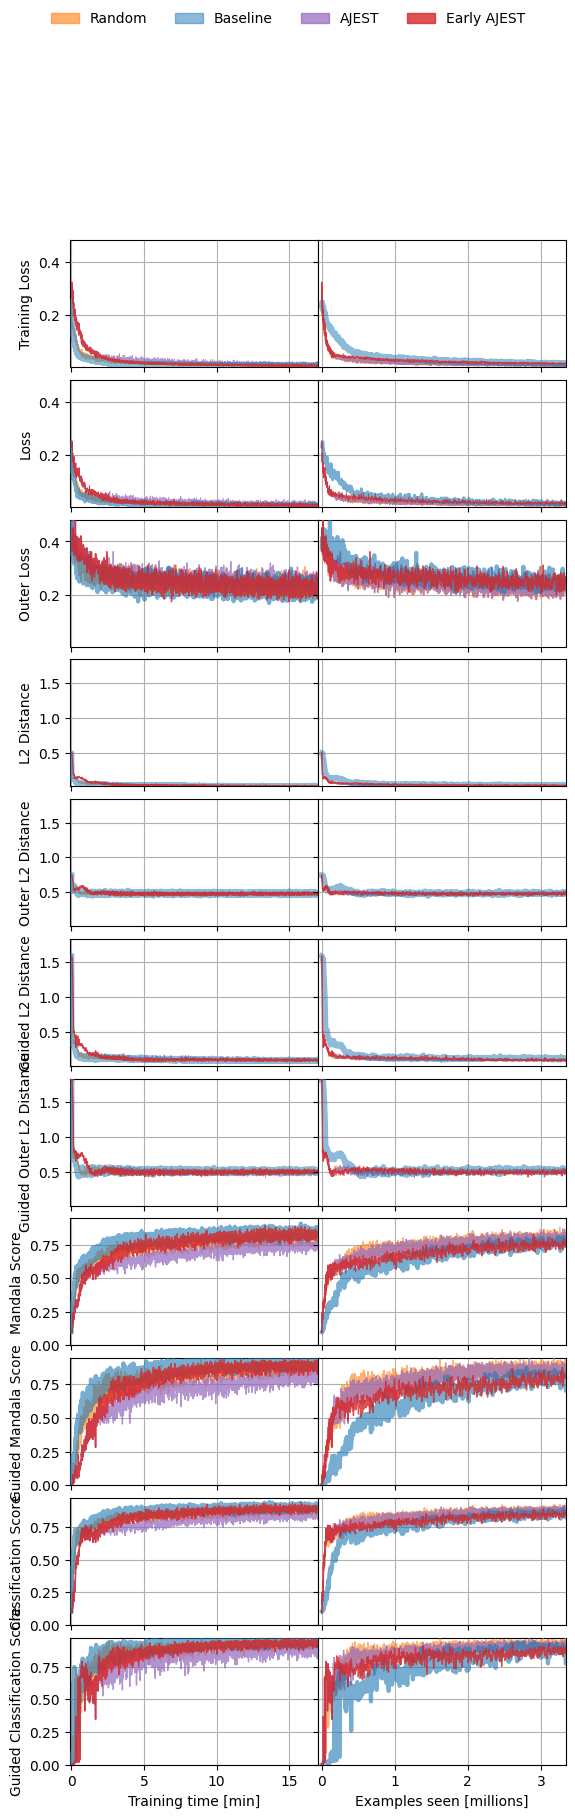

In [57]:
s = series[0]
selected_val_keys = [key for key in val_keys if len(sorted_val_results[key][s][series_folders[s][0]])!=0]
selected_val_keys = vtext.filter_by_string_must(selected_val_keys, ["guide_"], must=False)

n_rows = len(selected_val_keys)+1
fig, axes = plt.subplots(nrows=n_rows, ncols=2, sharex="col", sharey="row", 
                         gridspec_kw=dict(hspace=0.1, wspace=0), figsize=[3.2*2, 1.8*n_rows])

x_lims = [(-0.1, 16.96), (-0.05, 3.342336)]
x_factors = [16.96/10.04, 1]
y_lims = [[], []]

for axs, x_key, x_fc, lms in zip(axes.T, x_keys, x_factors, x_lims):
    for f in series_folders[s]:
        axs[0].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_results["learner_loss"][s][f],
                    **plt_kwargs[label_series[s][f]])
        y_lims[0].append(min(sorted_results["learner_loss"][s][f]))
        y_lims[1].append(max(sorted_results["learner_loss"][s][f]))
        for ax, m in zip(axs[1:], sorted_selected_val_keys):
            n_epochs = len(sorted_val_results[m][s][f])
            if n_epochs!=0:
                if "score" in m or ("out" in m and "loss" in m):
                    kwargs = plt_kwargs_zoom
                elif "L2" in m:
                    kwargs = plt_kwargs
                else:
                    kwargs = plt_kwargs_thin
                ax.plot(np.array(x_results[x_key][s][f])[:n_epochs]*x_fc, 
                        sorted_val_results[m][s][f], 
                        **kwargs[label_series[s][f]])
                y_lims[0].append(min(sorted_val_results[m][s][f]))
                y_lims[1].append(max(sorted_val_results[m][s][f]))
    for ax in axs: ax.grid()
    axs[-1].set_xlabel(x_names[x_key])
    axs[-1].set_xlim(lms)
axes[0][0].set_ylabel("Training Loss")
for m, axs in zip(sorted_selected_val_keys, axes[1:]):
    n = "".join(final_val_names[m].split("Validation "))
    n = "".join(n.split("Average "))
    axs[0].set_ylabel(n)
y_groups = [[0,1,2],[3,4,5,6],[7,8],[9,10]]
for y_group in y_groups:
    y_min = min(np.array(y_lims[0])[y_group])
    y_max = max(np.array(y_lims[1])[y_group])
    for ax_n in y_group: axes[ax_n][0].set_ylim((y_min, y_max))

fig.legend([Patch(facecolor=plt_kwargs[st]["color"], 
                  edgecolor=plt_kwargs[st]["color"], 
                  alpha=plt_kwargs[st]["alpha"]) for st in [label_series[s][f] for f in series_folders[s]]], 
           [label_series[s][f] for f in series_folders[s]], 
           loc='outside upper center', ncols=4, frameon=False)

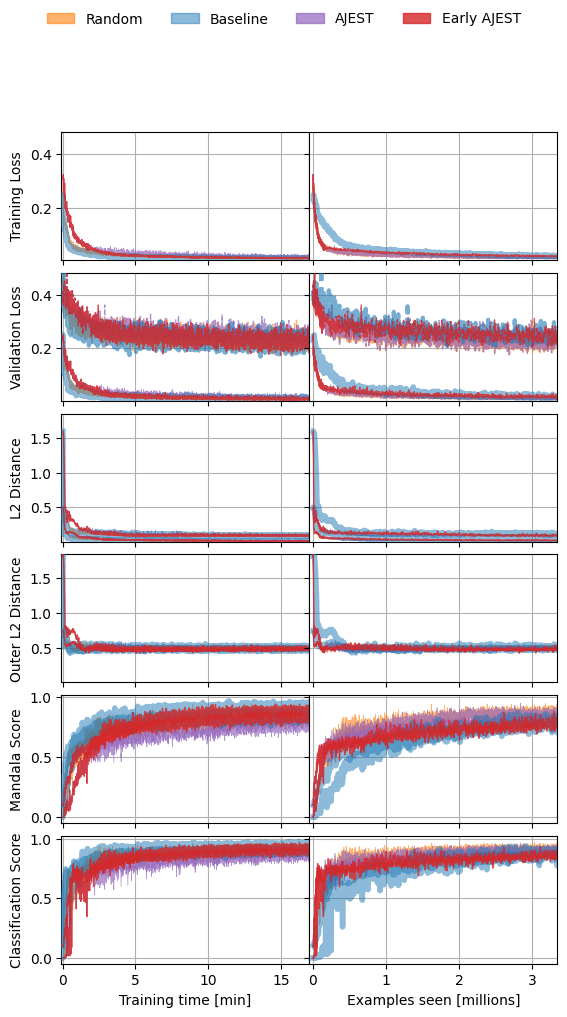

In [45]:
s = series[0]
selected_val_keys = [key for key in val_keys if len(sorted_val_results[key][s][series_folders[s][0]])!=0]
selected_val_keys = vtext.filter_by_string_must(selected_val_keys, ["guide_"], must=False)

n_rows = 6
fig, axes = plt.subplots(nrows=n_rows, ncols=2, sharex="col", sharey="row", 
                         gridspec_kw=dict(hspace=0.1, wspace=0), figsize=[3.2*2, 1.8*n_rows])

# keys = ["nimg", "time"]
# names = ["Examples Seen [millions]", "Time [hs]"]
x_lims = [(-0.1, 16.96), (-0.05, 3.342336)]
x_factors = [16.96/10.04, 1]

# axes.T[0].set_xlim([])

# for axs, x_key, name, lms in zip(axes.T, x_keys, names, lims):
y_lims_L2 = [[],[]]
y_lims_loss = [[],[]]
for axs, x_key, x_fc, lms in zip(axes.T, x_keys, x_factors, x_lims):
    for f in series_folders[s]:
        axs[0].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_results["learner_loss"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[1].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_val_loss"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[1].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_out_val_loss"][s][f],
                    **plt_kwargs_zoom[label_series[s][f]])
        y_lims_loss[0].append(min([min(sorted_results["learner_loss"][s][f]),
                                  min(sorted_val_results["learner_val_loss"][s][f]), 
                                  min(sorted_val_results["learner_out_val_loss"][s][f])]))
        y_lims_loss[1].append(max([max(sorted_results["learner_loss"][s][f]),
                                  max(sorted_val_results["learner_val_loss"][s][f]), 
                                  max(sorted_val_results["learner_out_val_loss"][s][f])]))
        axs[2].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["L2_val_metric"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[2].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["guided_L2_val_metric"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[3].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["out_L2_val_metric"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[3].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["guided_out_L2_val_metric"][s][f],
                    **plt_kwargs[label_series[s][f]])
        y_lims_L2[0].append(min([min(sorted_val_results["L2_val_metric"][s][f]), 
                               min(sorted_val_results["guided_L2_val_metric"][s][f]),
                               min(sorted_val_results["out_L2_val_metric"][s][f]), 
                               min(sorted_val_results["guided_out_L2_val_metric"][s][f])]))
        y_lims_L2[1].append(max([max(sorted_val_results["L2_val_metric"][s][f]), 
                                max(sorted_val_results["guided_L2_val_metric"][s][f]),
                                max(sorted_val_results["out_L2_val_metric"][s][f]), 
                                max(sorted_val_results["guided_out_L2_val_metric"][s][f])]))
        axs[4].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_mandala_score"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[4].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_guided_mandala_score"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[5].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_classification_score"][s][f],
                    **plt_kwargs[label_series[s][f]])
        axs[5].plot(np.array(x_results[x_key][s][f])*x_fc, 
                    sorted_val_results["learner_guided_classification_score"][s][f],
                    **plt_kwargs[label_series[s][f]])
    for ax in axs: ax.grid()
    axs[-1].set_xlabel(x_names[x_key])
    axs[-1].set_xlim(lms)
axes[0][0].set_ylabel("Training Loss")
axes[0][0].set_ylim((min(y_lims_loss[0]), max(y_lims_loss[1])))
axes[1][0].set_ylim((min(y_lims_loss[0]), max(y_lims_loss[1])))
axes[2][0].set_ylim((min(y_lims_L2[0]), max(y_lims_L2[1])))
axes[3][0].set_ylim((min(y_lims_L2[0]), max(y_lims_L2[1])))
axes[0][0].set_ylabel("Training Loss")
axes[1][0].set_ylabel("Validation Loss")
axes[2][0].set_ylabel("L2 Distance")
axes[3][0].set_ylabel("Outer L2 Distance")
axes[4][0].set_ylabel("Mandala Score")
axes[5][0].set_ylabel("Classification Score")

fig.legend([Patch(facecolor=plt_kwargs[st]["color"], 
                  edgecolor=plt_kwargs[st]["color"], 
                  alpha=plt_kwargs[st]["alpha"]) for st in [label_series[s][f] for f in series_folders[s]]], 
           [label_series[s][f] for f in series_folders[s]], 
           loc='outside upper center', ncols=4, frameon=False)

In [52]:
{**{"hi":3}, **{"hello":2, "hi":5}}

{'hi': 5, 'hello': 2}